# GMM(Gaussian Mixture Model, LDA를 이용한 차원 축소)
- 여러 개의 가우시안 분포의 데이터 집합이 섞여서 생성된 데이터라고 가정
- 두 가지를 추정
    - 개별 정규 분포의 평균과 분산
    - 각 데이터가 어느 정규 분포에 해당하는지의 확률
- 다양한 데이터에 잘 적용됨
- 수행 시간이 오래 걸림

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture

%matplotlib inline

In [2]:
hw = pd.read_csv(r'C:\Users\arceu\Desktop\homework\hw.csv')

hw_target = hw['target']
hw_features = hw.drop('target', axis=1, inplace=False)

df = pd.DataFrame(hw_features, columns=['f1', 'f2', 'f3', 'f4', 'f5'])
df['target'] = hw_target

In [3]:
gmm = GaussianMixture(n_components=2).fit(hw_features)
gmm_labels = gmm.predict(hw_features)
df['gmm_cluster'] = gmm_labels

hw_result = df.groupby(['target'])['gmm_cluster'].value_counts()
print(hw_result)

target  gmm_cluster
0       1              421
        0               79
1       0              426
        1               74
2       1              423
        0               77
3       0              422
        1               78
Name: gmm_cluster, dtype: int64


In [4]:
df = pd.DataFrame(data=hw_features, columns=['f1', 'f2', 'f3', 'f4', 'f5'])
df.head()

,f1,f2,f3,f4,f5
0,1.030972,-0.449614,0.581358,1.480586,2.511557
1,0.902691,0.372013,1.274705,0.530678,1.433370
2,-0.658288,0.761872,0.103584,-1.420159,-2.078447
3,1.908221,0.360373,2.268593,1.547848,3.456069
4,0.877666,0.153999,1.031665,0.723666,1.601332


In [5]:
hw_scaled = StandardScaler().fit_transform(hw_features) # data 정규화
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(hw_scaled, hw_target)
hw_lda = lda.transform(hw_scaled)

In [6]:
df['cluster'] = gmm_labels
df['component1'] = hw_lda[:, 0]
df['component2'] = hw_lda[:, 1]
df.head()

,f1,f2,f3,f4,f5,cluster,component1,component2
0,1.030972,-0.449614,0.581358,1.480586,2.511557,0,2.243355,0.455772
1,0.902691,0.372013,1.274705,0.530678,1.433370,0,-0.034032,-0.672026
2,-0.658288,0.761872,0.103584,-1.420159,-2.078447,1,-2.181906,0.595953
3,1.908221,0.360373,2.268593,1.547848,3.456069,0,0.712330,-1.862497
4,0.877666,0.153999,1.031665,0.723666,1.601332,0,0.528237,-0.301777


In [7]:
df['GMM_label'] = gmm_labels
centers = np.empty(shape=(gmm.n_components, hw_features.shape[1])) # GMM은 중심점을 구해주는 method가 없어 mean, variance를 이용해 중심점을 찾는다
unique_labels = np.unique(gmm_labels)
markers = ['o', 'd']

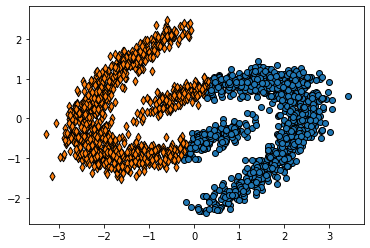

In [8]:
for label in unique_labels:
    label_cluster = df[df['GMM_label'] == label]
    center = centers[label]
    plt.scatter(x=label_cluster['component1'], y=label_cluster['component2'], edgecolor='k', marker=markers[label])
plt.show()